# 1. 문제정의 


  ## 1.1 경진대회 소개

- 물류 유통량 예측 경진 대회 (회귀모델)

- 제주시 내 택배 운송 데이터를 이용하여 운송량 예측 AI 개발

- https://dacon.io/competitions/official/235867/overview/description

- 주최 : 국토연구원
- 주관 : 데이콘 
    ### 1.1.1 평가
  - 평가산식 : RMSE
  - Public 평가 : 테스트 데이터 중 랜덤 샘플 된 50%로 채점
  - Private 평가 : 나머지 50 % 테스트 데이터로 채점

    ### 1.1.2 배경
    - 코로나 19는 경제, 사회 분야의 구조적 변화를 촉발하여 비대면화와 디지털 전환을 가속화 시키고 있으며, 
    비대면 거래의 증가에 따라 2020년 택배 물량은 약 30억 건으로 전년 대비 21% 급증하였습니다.

    - 이에 따라 택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 경진대회를 개최합니다(사례지역:제주도).
    더욱 효율적인 물류 유통을 위해 택배 운송량을 예측해주세요! 

    ### 1.1.3 데이터 분석 대상
    - train : 총 31,684행의 데이터 5열
    - test : 총 7,920행의 데이터 4열("운송장_건수" 제외)

    => train 데이터를 이용해 모델을 학습 시킨 뒤 test 데이터를 활용해 **"운송장_건수 "** 예측

    

## 1.2 데이터 도메인 정보
- index : 인덱스
- 송하인_격자공간고유번호 : 
- 수하인 격자공간고유번호 : 
- 물품_카테고리 : 물품 종류
- 운송장_건수 : 

## 1.3 평가척도
=> 참가자가 최종적으로 제출한 결과물의 우열을 판단하는 척도

- 본 대회에서는 RMSE라는 평가척도를 적용합니다. 이 RMSE 값은 회귀모델에서 평가지표로 사용하는 지표 중 하나이다.

## 1.4 문제 해결을 위한 접근 방식


- **EDA -> 전처리 -> 데이터 모델링 -> 결과 확인 ->모델링 성능 개선**

## 1.5 섹션 아이디어

[1229]

  - 송하인이나 수하인이 같은경우? -> 고정적으로 택배 배송을 하는경우가 있을까?

# 2. 데이터 간단히 탐색

In [ ]:
# 버젼 설정
today = "0106_2"

## 2.2 데이터 로드


### 2.2.1 학습 데이터

In [ ]:
#!pip install pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 학습 데이터 로드
X = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/train.csv")

In [ ]:
# 학습 데이터 기본 정보 파악
display(X.info())

display(X.head())

display(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


None

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


- 송하인 격자고유번호 별로 확인?
- 수하인 격자고유번호 별로 확인

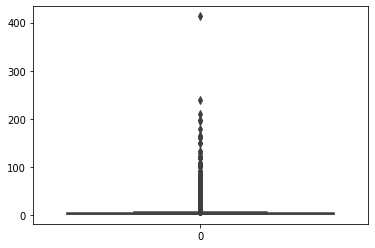

In [ ]:
# 이상치 좀 더 확인
sns.boxplot(data = X['운송장_건수'])
plt.show()

- 이상치가 존재한다고 보여지는데,,,

In [ ]:
#결측값 추출
display(pd.DataFrame(X.isnull().sum()).T)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,0,0,0,0


- 결측값이 없다.

In [ ]:
# 중복데이터 확인
temp = X.drop("index",axis = 1)
print(temp.duplicated().sum())

display(temp[temp.duplicated()])


0


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수


- 중복데이터가 없다.

In [ ]:
display(X["송하인_격자공간고유번호"].value_counts())
display(X["수하인_격자공간고유번호"].value_counts())


5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4313000554077200       1
5013000868030300       1
1165000018039100       1
2638000028097200       1
1147000002005400       1
Name: 송하인_격자공간고유번호, Length: 4229, dtype: int64

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
1141000008065400     1
4783000207071400     1
3017000014085200     1
5013000640012300     1
2726000056072100     1
Name: 수하인_격자공간고유번호, Length: 26875, dtype: int64

### 2.2.2 테스트 데이터

In [ ]:
# 테스트 데이터 로드
test = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/test.csv")

In [ ]:
# 테스트 데이터 기본 정보 파악
display(test.info())

display(test.head())

display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


None

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


,index,송하인_격자공간고유번호,수하인_격자공간고유번호
count,7920.000000,7.920000e+03,7.920000e+03
mean,3959.500000,4.637194e+15,3.807972e+15
std,2286.451399,8.524477e+14,1.321640e+15
min,0.000000,1.111000e+15,1.111000e+15
25%,1979.750000,4.579000e+15,2.826000e+15
50%,3959.500000,5.011000e+15,4.159001e+15
75%,5939.250000,5.013001e+15,5.011000e+15
max,7919.000000,5.013001e+15,5.013001e+15


In [ ]:
# 중복 데이터.
display(test.drop("index",axis = 1).duplicated().sum()) 

0

In [ ]:
display(test["송하인_격자공간고유번호"].value_counts())
display(test["수하인_격자공간고유번호"].value_counts())

5011000078068400    964
5013000610049100    488
5013000731055200    293
5011000137030100    259
5013000821028200    165
                   ... 
5013000733046100      1
5011000852067400      1
5013000468043100      1
5011000213083200      1
1156000014036400      1
Name: 송하인_격자공간고유번호, Length: 1812, dtype: int64

5011000488033200    8
5011000596012200    7
5011000543041100    7
5011000374043300    6
5011000314069300    6
                   ..
4111100032018400    1
5011000319069400    1
5011000373030100    1
5011000632042100    1
5011000374077100    1
Name: 수하인_격자공간고유번호, Length: 7453, dtype: int64

격자공간고유번호 분석 결과
15자리
/00000

### 2.2.3 제출 데이터

In [ ]:
# 테스트 데이터 로드
sub = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/sample_submission.csv")

In [ ]:
# 테스트 데이터 기본 정보 파악
display(sub.info())

display(sub.head())

display(sub.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   7920 non-null   int64
 1   운송장_건수  7920 non-null   int64
dtypes: int64(2)
memory usage: 123.9 KB


None

,index,운송장_건수
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


,index,운송장_건수
count,7920.000000,7920.0
mean,3959.500000,0.0
std,2286.451399,0.0
min,0.000000,0.0
25%,1979.750000,0.0
50%,3959.500000,0.0
75%,5939.250000,0.0
max,7919.000000,0.0


### 2.2.4 train vs test

학습 데이터와 테스트 데이터 비교


In [ ]:
def check_train_test_column_values(train, test, column):
    # 함수 정의: 두 데이터 테이블과 특정 컬럼을 집어 넣으면 value를 비교하여 출력하는 함수
    print("{} Column에 대한 train_test_values_check 입니다=======================".format(column))
    # Train/Test set의 입력 칼럼의 value를 set으로 받아줍니다.
    train_colset = set(train[column])
    test_colset  = set(test[column])

    # Train/Test-set 고유한 value의 개수를 구함.
    print(f"Train-set에 있는 고유한 value 개수 : {len(train_colset)}")
    print(f"Test-set에 있는 고유한 value 개수 : {len(test_colset)}")

    # Train/Test-set 모두에 포함되어있는 value를 구함.
    print('='* 80)
    common_colset = train_colset.intersection(test_colset)
    print(f"Train/Test-set에 공통으로 포함되어 있는 value 개수 : {len(common_colset)}")
    if len(common_colset) > 100: # value가 너무 많으면 어차피 보기 힘드므로 출력을 pass 합니다
        pass
    else:
        try: # int나 float은 sorted가 먹지 않기 때문에 try except로 넣어줍니다.
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {sorted(common_colset)}")
        except:
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {(common_colset)}")

    # Train-set에만 있는 value를 구함.
    print('='* 80)
    train_only_colset = train_colset.difference(test_colset)
    print(f"Train-set에만 있는 value는 총 {len(train_only_colset)} 개 입니다.")
    if len(train_only_colset) > 100:
        pass
    else:
        try:
            print(f"Train-set에만 있는 value는 : {sorted(train_only_colset)}")
        except:
            print(f"Train-set에만 있는 value는 : {(train_only_colset)}")

    # Test-set에만 있는 value를 구함.
    print('='* 80)
    test_only_colset = test_colset.difference(train_colset)
    print(f"Test-set에만 있는 value는 총 {len(test_only_colset)} 개 입니다.")
    if len(test_only_colset) > 100:
        pass
    else:
        try:
            print(f"Test-set에만 있는 value는 : {sorted(test_only_colset)}")
        except:
            print(f"Test-set에만 있는 value는 : {(test_only_colset)}")
    print(" ")

In [ ]:
# 데이터 타입 변경
X = X.astype(object)
test = test.astype(object)
X["운송장_건수"] = X["운송장_건수"].astype(int)

display(X.info())
display(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  object
 1   송하인_격자공간고유번호  31684 non-null  object
 2   수하인_격자공간고유번호  31684 non-null  object
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   object
 1   송하인_격자공간고유번호  7920 non-null   object
 2   수하인_격자공간고유번호  7920 non-null   object
 3   물품_카테고리       7920 non-null   object
dtypes: object(4)
memory usage: 247.6+ KB


None

In [ ]:
obj_cols = []
for col in X.drop('운송장_건수',axis = 1).columns:
    if X[col].dtypes == 'object':
        obj_cols.append(col)

In [ ]:
for col in obj_cols:
    check_train_test_column_values(X, test, col)

index Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 31684
Test-set에 있는 고유한 value 개수 : 7920
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 7920
Train-set에만 있는 value는 총 23764 개 입니다.
Test-set에만 있는 value는 총 0 개 입니다.
Test-set에만 있는 value는 : []
 
송하인_격자공간고유번호 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 4229
Test-set에 있는 고유한 value 개수 : 1812
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 1233
Train-set에만 있는 value는 총 2996 개 입니다.
Test-set에만 있는 value는 총 579 개 입니다.
 
수하인_격자공간고유번호 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 26875
Test-set에 있는 고유한 value 개수 : 7453
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 1616
Train-set에만 있는 value는 총 25259 개 입니다.
Test-set에만 있는 value는 총 5837 개 입니다.
 
물품_카테고리 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 100
Test-set에 있는 고유한 value 개수 : 100
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 100
Train/Test-set에 공통으로 포

### 2.2.5 분포 확인


Q. 반복적으로 배송을 주고받는 곳이 존재할까?

In [ ]:
# # 반복적으로 배송을 요청하는 열을 확인하기위해 열 생성
# X["repeat"] =  X['송하인_격자공간고유번호'].astype(str) + '_' + X['수하인_격자공간고유번호'].astype(str)
# test["repeat"] =  test['송하인_격자공간고유번호'].astype(str) + '_' + test['수하인_격자공간고유번호'].astype(str)

In [ ]:
# X.repeat.value_counts()

In [ ]:
# test.repeat.value_counts()

A. 아직 뚜렷한 인사이트 도출 실패

In [ ]:
X_g = X.groupby("송하인_격자공간고유번호").mean().sort_values(by = "운송장_건수" )
display(X_g)

,운송장_건수
송하인_격자공간고유번호,
4167000549008100,3.0
4119900011099400,3.0
5011000326002200,3.0
4119900010093100,3.0
4119900010058200,3.0
...,...
5013000865020400,120.0
4521000300033100,120.0
1165000006038300,134.0


In [ ]:
X_g = X.groupby("수하인_격자공간고유번호").mean().sort_values(by = "운송장_건수" )
display(X_g)

,운송장_건수
수하인_격자공간고유번호,
4146300030036400,3.0
4159000019040400,3.0
4159000019070400,3.0
4159000077059300,3.0
4159000104026400,3.0
...,...
4111700027062300,109.0
5011000168096300,143.0
5011000313002100,160.0


In [ ]:
X_g = X.groupby("물품_카테고리").mean().sort_values(by = "운송장_건수" ,ascending = False)
X_gs = X.groupby("물품_카테고리").size().sort_values(ascending = False)
display(X_g)
display(X_gs)

,운송장_건수
물품_카테고리,
선케어,24.000000
게임기/타이틀,14.500000
기타패션잡화,13.818182
기타패션의류,12.889831
낚시,12.866667
...,...
하의,3.306667
눈관리용품,3.285714
스포츠잡화,3.250000


물품_카테고리
농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
태블릿PC/노트북액세서리        4
스포츠잡화                4
유아가구                 4
기타출산/육아              4
선케어                  4
Length: 100, dtype: int64

대량 구매 가능(?) 여부를 체크

## 2.3 섹션 아이디어

- [1229]
  - 카테고리를 숫자형으로 인코딩하여 진행? or 원핫 인코딩
  - train / test 데이터 차이 확인 -> 송하인, 수신인에 공통되는 데이터가 존재...
  - train의 타겟 데이터에 이상치가 존재한다고 보여진다.
  - '송하인 + 수신인' 열 생성하여 반복적으로 배송을 요청하는 열 새로 생성
  - 격자 공간데이터에 대한 정보가 추가적으로 필요할 것으로 판단. (예상) - 격자 공간에 지역 정보가 담겨 있을것이다. 이를 통해 시나 구로 데이터를 나누어 분석 진행시 분석에 효율적인 파생변수를 얻어낼수 있을 것이라 판단.

- [0103]
  - 1) '물품' 열 값이 100개 너무 많다... -> 원-핫 인코딩보다는 라벨인코딩이 더 좋을 듯
  - 2) 법정동 코드 -> https://blog.naver.com/realland_/222346390695
  
  -> 광역시(2자리) + 시군구(3자리) + 읍면동(3자리) + 리(2자리) = 법정동코드

  -> + 5자리 고유번호 존재한다고 판단.

  -> 송하인, 수하인을 통해 5개씩 파생변수 생성

- [0104]
  - 1) repeat 열 중요도가 낮아 제거

- [0105]
  - 1) 특성중요도에 따라 법정동 코드 재결합

# 3. 데이터 전처리

## 3.1 결측치 처리

## 3.2 이상치 처리

## 3.2.1 운송장 건수

In [ ]:
# train

X[X["운송장_건수"] >= X["운송장_건수"].quantile(1)]

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
25394,25394,4117300018005400,5011000168096300,기타패션의류,413


## 3.3 파생변수 

### 3.3.1 repeat 열 생성 및 확인




In [ ]:
# # 반복적으로 배송을 요청하는 열을 확인하기위해 열 생성
# X["repeat"] =  X['SEND_SPG_INNB'].astype(str) + '_' + X['REC_SPG_INNB'].astype(str)
# test["repeat"] =  test['SEND_SPG_INNB'].astype(str) + '_' + test['REC_SPG_INNB'].astype(str)

### 3.3.2 행정동 코드 활용

In [ ]:
# # train 송하인
# X["송하인_광역시"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
# X["송하인_시군구"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
# X["송하인_읍면동"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
# X["송하인_리"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
# X["송하인_기타"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
# display(X)

In [ ]:
# train 송하인
X["송하인_광역시_시군구"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[:5])
X["송하인_읍면동_리"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:10])
X["송하인_기타"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(X)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타
0,0,5011000595017300,2871000192069300,음반,3,50110,00595,017300
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,00690,043300
2,2,5011000078068400,1120000007005400,농산물,3,50110,00078,068400
3,3,4127100048006400,5011000587019400,기타식품,7,41271,00048,006400
4,4,5011000078068400,2823700010076300,농산물,3,50110,00078,068400
...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,44710,00290,087200
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,11290,00014,045300
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,11290,00014,045300
31682,31682,4127300065073100,5011000264061200,지갑,7,41273,00065,073100


In [ ]:
# # train 수하인
# X["수하인_광역시"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
# X["수하인_시군구"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
# X["수하인_읍면동"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
# X["수하인_리"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
# X["수하인_기타"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
# display(X)

In [ ]:
# train 수하인
X["수하인_광역시_시군구"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[:5])

X["수하인_읍면동_리"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:10])

X["수하인_기타"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(X)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타
0,0,5011000595017300,2871000192069300,음반,3,50110,00595,017300,28710,00192,069300
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,00690,043300,50110,00264,024400
2,2,5011000078068400,1120000007005400,농산물,3,50110,00078,068400,11200,00007,005400
3,3,4127100048006400,5011000587019400,기타식품,7,41271,00048,006400,50110,00587,019400
4,4,5011000078068400,2823700010076300,농산물,3,50110,00078,068400,28237,00010,076300
...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,44710,00290,087200,50110,00213,073200
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,11290,00014,045300,50110,00319,087100
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,11290,00014,045300,50110,00263,065200
31682,31682,4127300065073100,5011000264061200,지갑,7,41273,00065,073100,50110,00264,061200


In [ ]:
# # test 송하인
# test["송하인_광역시"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
# test["송하인_시군구"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
# test["송하인_읍면동"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
# test["송하인_리"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
# test["송하인_기타"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
# display(test)

In [ ]:
# test 송하인
test["송하인_광역시_시군구"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[:5])

test["송하인_읍면동_리"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:10])

test["송하인_기타"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(test)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타
0,0,4167000577042200,5011000435014100,선케어,41670,00595,042200
1,1,1156000009012200,5011000172034400,구강위생용품,11560,00690,012200
2,2,4122000363057300,5011000361097300,캠핑,41220,00078,057300
3,3,5011000436041400,2826000084036400,아웃도어가구,50110,00048,041400
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41500,00078,065200
...,...,...,...,...,...,...,...
7915,7915,5011000266051200,4623000417038100,농산물,50110,00572,051200
7916,7916,1154500001098300,5011000264055100,문화컨텐츠,11545,00078,098300
7917,7917,5013000610049100,1147000018091400,농산물,50130,00535,049100
7918,7918,5013000610049100,3117000039026100,농산물,50130,00909,049100


In [ ]:
# # test 수하인
# test["수하인_광역시_시군구"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
# test["수하인_시군구"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
# test["수하인_읍면동"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
# test["수하인_리"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
# test["수하인_기타"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
# display(test)

In [ ]:
# test 수하인
test["수하인_광역시_시군구"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[:5])

test["수하인_읍면동_리"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:10])

test["수하인_기타"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(test)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타
0,0,4167000577042200,5011000435014100,선케어,41670,00595,042200,50110,00435,014100
1,1,1156000009012200,5011000172034400,구강위생용품,11560,00690,012200,50110,00172,034400
2,2,4122000363057300,5011000361097300,캠핑,41220,00078,057300,50110,00361,097300
3,3,5011000436041400,2826000084036400,아웃도어가구,50110,00048,041400,28260,00084,036400
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41500,00078,065200,50110,00169,044300
...,...,...,...,...,...,...,...,...,...,...
7915,7915,5011000266051200,4623000417038100,농산물,50110,00572,051200,46230,00417,038100
7916,7916,1154500001098300,5011000264055100,문화컨텐츠,11545,00078,098300,50110,00264,055100
7917,7917,5013000610049100,1147000018091400,농산물,50130,00535,049100,11470,00018,091400
7918,7918,5013000610049100,3117000039026100,농산물,50130,00909,049100,31170,00039,026100


### 3.3.3 카테고리 별 min, max, mean

In [ ]:
#카테고리 별 mean, min, max 만들기

temp = pd.DataFrame(X["물품_카테고리"].unique(),columns = ["물품_카테고리"])

temp = pd.merge(temp,X.groupby("물품_카테고리")["운송장_건수"].mean(),on = "물품_카테고리")

temp = pd.merge(temp,X.groupby("물품_카테고리")["운송장_건수"].min(),on = "물품_카테고리")

temp = pd.merge(temp,X.groupby("물품_카테고리")["운송장_건수"].max(),on = "물품_카테고리")

temp.columns = ["물품_카테고리","카테고리_mean","카테고리_min","카테고리_max"]
display(temp)

,물품_카테고리,카테고리_mean,카테고리_min,카테고리_max
0,음반,4.092014,3,48
1,문화컨텐츠,4.976169,3,118
2,농산물,4.322081,3,179
3,기타식품,6.088825,3,108
4,수산,5.674419,3,68
...,...,...,...,...
95,출산/유아동잡화,4.333333,3,7
96,세탁용품,3.333333,3,4
97,태블릿PC/노트북액세서리,10.000000,4,25
98,스마트디바이스,4.428571,3,7


In [ ]:
# train 데이터 셋과 결합
X_temp = pd.merge(X,temp,on = "물품_카테고리")
X = X_temp.sort_values(by = "index")
X

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타,카테고리_mean,카테고리_min,카테고리_max
0,0,5011000595017300,2871000192069300,음반,3,50110,00595,017300,28710,00192,069300,4.092014,3,48
576,1,4148000690043300,5011000264024400,문화컨텐츠,3,41480,00690,043300,50110,00264,024400,4.976169,3,118
1667,2,5011000078068400,1120000007005400,농산물,3,50110,00078,068400,11200,00007,005400,4.322081,3,179
21988,3,4127100048006400,5011000587019400,기타식품,7,41271,00048,006400,50110,00587,019400,6.088825,3,108
1668,4,5011000078068400,2823700010076300,농산물,3,50110,00078,068400,28237,00010,076300,4.322081,3,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31281,31679,4471000290087200,5011000213073200,스포츠잡화,3,44710,00290,087200,50110,00213,073200,3.250000,3,4
31677,31680,1129000014045300,5011000319087100,스마트디바이스,4,11290,00014,045300,50110,00319,087100,4.428571,3,7
31678,31681,1129000014045300,5011000263065200,스마트디바이스,6,11290,00014,045300,50110,00263,065200,4.428571,3,7
31683,31682,4127300065073100,5011000264061200,지갑,7,41273,00065,073100,50110,00264,061200,4.400000,3,7


In [ ]:
# train 데이터 셋과 결합
test_temp = pd.merge(test,temp,on = "물품_카테고리")
test = test_temp.sort_values(by = "index")
test

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타,카테고리_mean,카테고리_min,카테고리_max
0,0,4167000577042200,5011000435014100,선케어,41670,00595,042200,50110,00435,014100,24.000000,3,38
2,1,1156000009012200,5011000172034400,구강위생용품,11560,00690,012200,50110,00172,034400,9.714286,3,32
4,2,4122000363057300,5011000361097300,캠핑,41220,00078,057300,50110,00361,097300,7.166667,5,14
6,3,5011000436041400,2826000084036400,아웃도어가구,50110,00048,041400,28260,00084,036400,5.500000,3,15
7,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41500,00078,065200,50110,00169,044300,4.090909,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,7915,5011000266051200,4623000417038100,농산물,50110,00572,051200,46230,00417,038100,4.322081,3,179
7439,7916,1154500001098300,5011000264055100,문화컨텐츠,11545,00078,098300,50110,00264,055100,4.976169,3,118
6209,7917,5013000610049100,1147000018091400,농산물,50130,00535,049100,11470,00018,091400,4.322081,3,179
6210,7918,5013000610049100,3117000039026100,농산물,50130,00909,049100,31170,00039,026100,4.322081,3,179


## 3.4 원-핫 인코딩

In [ ]:
# # 수치형 변수 추출
# v_i = ["송하인_격자공간고유번호","수하인_격자공간고유번호","repeat"]
# tr_i = X[v_i]
# tr_s = X.drop(v_i,axis=1)
# tr_s = tr_s.drop(["index","운송장_건수"],axis = 1)
# tr_t = X["운송장_건수"]

In [ ]:
# # 수치형 변수 추출
# v_i = ["송하인_격자공간고유번호","수하인_격자공간고유번호","repeat"]
# te_i = test[v_i]
# te_s = test.drop(v_i,axis=1) 
# te_s = te_s.drop("index",axis = 1)


In [ ]:
# tr_dummy = pd.get_dummies(tr_s)
# te_dummy = pd.get_dummies(te_s)
# display(tr_dummy)

## 3.5 라벨 인코딩

In [ ]:
# 오브젝트형 column 가지고 오기
ob_col = ["물품_카테고리"]
print(ob_col)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ob_col:
  X[i] = le.fit_transform(X[i])
  test[i] = le.transform(test[i])

new_X = X.drop(["index","운송장_건수"],axis = 1)
new_test = test.drop("index",axis = 1)
y = X.운송장_건수

display(new_X)
display(new_test)
display(y)


['물품_카테고리']


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타,카테고리_mean,카테고리_min,카테고리_max
0,5011000595017300,2871000192069300,67,50110,00595,017300,28710,00192,069300,4.092014,3,48
576,4148000690043300,5011000264024400,34,41480,00690,043300,50110,00264,024400,4.976169,3,118
1667,5011000078068400,1120000007005400,27,50110,00078,068400,11200,00007,005400,4.322081,3,179
21988,4127100048006400,5011000587019400,17,41271,00048,006400,50110,00587,019400,6.088825,3,108
1668,5011000078068400,2823700010076300,27,50110,00078,068400,28237,00010,076300,4.322081,3,179
...,...,...,...,...,...,...,...,...,...,...,...,...
31281,4471000290087200,5011000213073200,55,44710,00290,087200,50110,00213,073200,3.250000,3,4
31677,1129000014045300,5011000319087100,52,11290,00014,045300,50110,00319,087100,4.428571,3,7
31678,1129000014045300,5011000263065200,52,11290,00014,045300,50110,00263,065200,4.428571,3,7
31683,4127300065073100,5011000264061200,79,41273,00065,073100,50110,00264,061200,4.400000,3,7


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타,카테고리_mean,카테고리_min,카테고리_max
0,4167000577042200,5011000435014100,47,41670,00595,042200,50110,00435,014100,24.000000,3,38
2,1156000009012200,5011000172034400,12,11560,00690,012200,50110,00172,034400,9.714286,3,32
4,4122000363057300,5011000361097300,88,41220,00078,057300,50110,00361,097300,7.166667,5,14
6,5011000436041400,2826000084036400,58,50110,00048,041400,28260,00084,036400,5.500000,3,15
7,4150000241065200,5011000169044300,39,41500,00078,065200,50110,00169,044300,4.090909,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
6208,5011000266051200,4623000417038100,27,50110,00572,051200,46230,00417,038100,4.322081,3,179
7439,1154500001098300,5011000264055100,34,11545,00078,098300,50110,00264,055100,4.976169,3,118
6209,5013000610049100,1147000018091400,27,50130,00535,049100,11470,00018,091400,4.322081,3,179
6210,5013000610049100,3117000039026100,27,50130,00909,049100,31170,00039,026100,4.322081,3,179


0        3
576      3
1667     3
21988    7
1668     3
        ..
31281    3
31677    4
31678    6
31683    7
31667    4
Name: 운송장_건수, Length: 31684, dtype: int64

## 3.6 데이터 통합

In [ ]:
# #수치형 변수와 범주형 변수 데이터열 합성
# new_X = pd.concat([tr_i,tr_dummy],axis= 1)
# new_test = pd.concat([te_i,te_dummy],axis= 1)
# y = tr_t.astype(int)
# display(new_X.info())
# display(new_test.info())
# # display(tr_t)

## 3.7 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# sc = StandardScaler()
# new_X[v_i] = sc.fit_transform(new_X[v_i])
# new_test[v_i] = sc.transform(new_test[v_i])

## 3.8 클러스터링
- 타겟을 결정짓는 뚜렷한 특징을 갖는 피쳐를 찾지 못해 clustering 시도


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53364 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47084 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53552 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50724 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

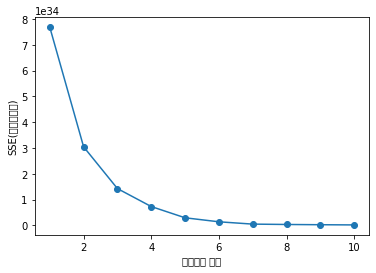

In [ ]:
# 최적의 클러스터 개수 선정
def elbow(X):
    sse=[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel("클러스터 개수")
    plt.ylabel("SSE(오차제곱합)")
    plt.show()
       
elbow(new_X)

5~6개 정도의 클러스터가 사용되면 괜찮을 것 같다.

In [ ]:
# # 클러스터링 진행

# kmeans = KMeans(n_clusters=5, random_state=42).fit(new_X)
# new_X['cluster'] = kmeans.predict(new_X)
# new_test['cluster'] = kmeans.predict(new_test)

## 3.9 최종 데이터 확인 및 저장


In [ ]:
# 학습 데이터 기본 정보 파악
display(new_X.info())

display(new_X.head().T)

display(new_X.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31684 entries, 0 to 31667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   송하인_격자공간고유번호  31684 non-null  object 
 1   수하인_격자공간고유번호  31684 non-null  object 
 2   물품_카테고리       31684 non-null  int64  
 3   송하인_광역시_시군구   31684 non-null  object 
 4   송하인_읍면동_리     31684 non-null  object 
 5   송하인_기타        31684 non-null  object 
 6   수하인_광역시_시군구   31684 non-null  object 
 7   수하인_읍면동_리     31684 non-null  object 
 8   수하인_기타        31684 non-null  object 
 9   카테고리_mean     31684 non-null  float64
 10  카테고리_min      31684 non-null  int64  
 11  카테고리_max      31684 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 3.1+ MB


None

,0,576,1667,21988,1668
송하인_격자공간고유번호,5011000595017300,4148000690043300,5011000078068400,4127100048006400,5011000078068400
수하인_격자공간고유번호,2871000192069300,5011000264024400,1120000007005400,5011000587019400,2823700010076300
물품_카테고리,67,34,27,17,27
송하인_광역시_시군구,50110,41480,50110,41271,50110
송하인_읍면동_리,00595,00690,00078,00048,00078
송하인_기타,017300,043300,068400,006400,068400
수하인_광역시_시군구,28710,50110,11200,50110,28237
수하인_읍면동_리,00192,00264,00007,00587,00010
수하인_기타,069300,024400,005400,019400,076300
카테고리_mean,4.09201,4.97617,4.32208,6.08883,4.32208


,물품_카테고리,카테고리_mean,카테고리_min,카테고리_max
count,31684.000000,31684.000000,31684.000000,31684.000000
mean,31.810409,4.879308,3.000505,145.525881
std,16.899420,1.325943,0.029724,58.782079
min,0.000000,3.250000,3.000000,4.000000
25%,27.000000,4.322081,3.000000,108.000000
50%,27.000000,4.322081,3.000000,179.000000
75%,27.000000,4.976169,3.000000,179.000000
max,99.000000,24.000000,5.000000,413.000000


In [ ]:
display(new_test.info())

display(new_test.head().T)

display(new_test.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 0 to 7440
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   송하인_격자공간고유번호  7920 non-null   object 
 1   수하인_격자공간고유번호  7920 non-null   object 
 2   물품_카테고리       7920 non-null   int64  
 3   송하인_광역시_시군구   7920 non-null   object 
 4   송하인_읍면동_리     7920 non-null   object 
 5   송하인_기타        7920 non-null   object 
 6   수하인_광역시_시군구   7920 non-null   object 
 7   수하인_읍면동_리     7920 non-null   object 
 8   수하인_기타        7920 non-null   object 
 9   카테고리_mean     7920 non-null   float64
 10  카테고리_min      7920 non-null   int64  
 11  카테고리_max      7920 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 804.4+ KB


None

,0,2,4,6,7
송하인_격자공간고유번호,4167000577042200,1156000009012200,4122000363057300,5011000436041400,4150000241065200
수하인_격자공간고유번호,5011000435014100,5011000172034400,5011000361097300,2826000084036400,5011000169044300
물품_카테고리,47,12,88,58,39
송하인_광역시_시군구,41670,11560,41220,50110,41500
송하인_읍면동_리,00595,00690,00078,00048,00078
송하인_기타,042200,012200,057300,041400,065200
수하인_광역시_시군구,50110,50110,50110,28260,50110
수하인_읍면동_리,00435,00172,00361,00084,00169
수하인_기타,014100,034400,097300,036400,044300
카테고리_mean,24,9.71429,7.16667,5.5,4.09091


,물품_카테고리,카테고리_mean,카테고리_min,카테고리_max
count,7920.000000,7920.000000,7920.000000,7920.000000
mean,31.822980,4.881566,3.000631,145.565025
std,16.923551,1.344841,0.033706,58.865681
min,0.000000,3.250000,3.000000,4.000000
25%,27.000000,4.322081,3.000000,108.000000
50%,27.000000,4.322081,3.000000,179.000000
75%,27.000000,4.976169,3.000000,179.000000
max,99.000000,24.000000,5.000000,413.000000


In [ ]:
# 데이터 저장
new_X.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
y.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
new_test.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")

# 4. 데이터 분할

## 4.1 데이터 분할

In [ ]:
#앞에 저장한 데이터 로드

X = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_X_{}.csv".format(today), encoding = "cp949")
y = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/y_{}.csv".format(today), encoding = "cp949")
test = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_test_{}.csv".format(today), encoding = "cp949")

In [ ]:
X

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시_시군구,송하인_읍면동_리,송하인_기타,수하인_광역시_시군구,수하인_읍면동_리,수하인_기타,카테고리_mean,카테고리_min,카테고리_max
0,5011000595017300,2871000192069300,67,50110,595,17300,28710,192,69300,4.092014,3,48
1,4148000690043300,5011000264024400,34,41480,690,43300,50110,264,24400,4.976169,3,118
2,5011000078068400,1120000007005400,27,50110,78,68400,11200,7,5400,4.322081,3,179
3,4127100048006400,5011000587019400,17,41271,48,6400,50110,587,19400,6.088825,3,108
4,5011000078068400,2823700010076300,27,50110,78,68400,28237,10,76300,4.322081,3,179
...,...,...,...,...,...,...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,55,44710,290,87200,50110,213,73200,3.250000,3,4
31680,1129000014045300,5011000319087100,52,11290,14,45300,50110,319,87100,4.428571,3,7
31681,1129000014045300,5011000263065200,52,11290,14,45300,50110,263,65200,4.428571,3,7
31682,4127300065073100,5011000264061200,79,41273,65,73100,50110,264,61200,4.400000,3,7


In [ ]:
# X = X.drop(["송하인_격자공간고유번호","수하인_격자공간고유번호"],axis = 1)
# test = test.drop(["송하인_격자공간고유번호","수하인_격자공간고유번호"],axis = 1)

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y["운송장_건수"],test_size = 0.40, random_state = 42)

In [ ]:
# # AutoML을 위한 데이터셋 변형
# X = pd.concat([X,y],axis = 1 )
# display(X)
# display(test)

## 4.2 데이터 교차검증

# 5. 모델링

## 5.1 모델 선정을 위한 AutoML 활용

In [ ]:
# for "4. Modeling with Pycaret"
# import warnings
# warnings.filterwarnings('ignore')
# import random
# from pycaret.classification import *
import sklearn
from pycaret.regression import *

In [ ]:
reg = setup(X, 
            preprocess = False, # True로 설정되면, 자체적인 Feature Engineering을 추가로 진행해 Predict가 불가능해진다.
            train_size = 0.999,  # 우리는 전체 데이터를 학습해 test를 예측하는게 목표이기 때문에, 0.999로 설정한다.
            target = "운송장_건수", # 목표 변수.
            silent = True,
            use_gpu = True, # GPU가 있으면 사용하세요 (Cat BOost 속도 향상)
            numeric_features=list(X.drop(columns = ["운송장_건수"]).columns), # 모든 변수가 숫자로써의 의미가 있다.
            session_id = 2021,
            fold_shuffle = True
            )

,Description,Value
0,session_id,2021
1,Target,운송장_건수
2,Original Data,"(31684, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Transformed Train Set,"(31652, 8)"
7,Transformed Test Set,"(32, 8)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [ ]:
model_py = compare_models(n_select = 3, sort = 'RMSE',exclude = ['et', 'knn'])


# 포함하여 모델 탐색
# best_specific = compare_models(include = ['dt','rf','xgboost'])
# 제거하여 모델 탐색
# best_specific = compare_models(exclude = ['catboost', 'svm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.3157,3.810570e+01,6.1057,1.149000e-01,0.4273,0.4371,0.235
gbr,Gradient Boosting Regressor,2.3132,3.863410e+01,6.1422,1.110000e-01,0.4240,0.4374,1.929
ada,AdaBoost Regressor,2.7845,4.115030e+01,6.3433,4.230000e-02,0.4804,0.5993,0.241
rf,Random Forest Regressor,2.4579,4.137630e+01,6.3685,2.110000e-02,0.4613,0.4639,5.943
br,Bayesian Ridge,2.3706,4.393170e+01,6.4891,3.810000e-02,0.4326,0.4499,0.031
omp,Orthogonal Matching Pursuit,2.3724,4.395950e+01,6.4918,3.720000e-02,0.4324,0.4500,0.020
en,Elastic Net,2.3750,4.431170e+01,6.5145,3.150000e-02,0.4290,0.4523,0.256
lar,Least Angle Regression,2.4642,4.433330e+01,6.5217,2.760000e-02,0.4459,0.4807,0.022
lasso,Lasso Regression,2.3833,4.459510e+01,6.5350,2.550000e-02,0.4304,0.4544,0.238
lr,Linear Regression,2.4164,4.550300e+01,6.6029,4.800000e-03,0.4386,0.4616,0.032


In [ ]:
# tune_model(model_py, 
#            optimize = 'RMSE', 
#            choose_better = True,
#            n_iter = 20)

# final_model = finalize_model(model_py)

In [ ]:
# display(final_model.feature_importances_)
# display(X_train.columns)

# df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : final_model.feature_importances_})
# df_import.sort_values(by = "중요도")

In [ ]:
# # RMSE
# import numpy as np
# from sklearn.metrics import mean_squared_error 

# pred_train = final_model.predict(X_train)
# MSE_train = mean_squared_error(y_train, pred_train)
# display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

# pred_test = final_model.predict(X_test)
# MSE = mean_squared_error(y_test, pred_test)
# display("테스트 셋 데이터 : ",np.sqrt(MSE))

[1차 - 10번 반복]
훈련 셋 데이터 : 
5.4916799681611534

테스트 셋 데이터 : 
5.294271822728408

In [ ]:
# 앞서 선택한 5가지 모델 튜닝
models = []
for m in model_py[:2]:
    models.append(tune_model(m, 
                             optimize = 'RMSE', 
                             choose_better = True,
                            n_iter = 10))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2094,22.8256,4.7776,0.0570,0.4134,0.4425
1,2.2807,28.1948,5.3099,0.0673,0.4195,0.4350
2,2.2502,29.2041,5.4041,0.0618,0.4178,0.4420
3,2.3647,41.0772,6.4091,0.0345,0.4287,0.4442
4,2.4055,74.6683,8.6411,0.1658,0.4236,0.4360
5,2.4189,41.3207,6.4281,0.2890,0.4257,0.4360
6,2.3648,45.2117,6.7240,0.0532,0.4211,0.4384
7,2.2316,27.3412,5.2289,0.0080,0.4175,0.4453
8,2.3809,48.5017,6.9643,0.2779,0.4194,0.4445
9,2.2658,30.5502,5.5272,0.2086,0.4123,0.4362


In [ ]:
# 튜닝된 모델 앙상블
voting = blend_models(models, optimize = 'RMSE')

# 앙상블된 모델 최적화
voting = tune_model(voting, 
                 optimize = 'RMSE', 
                 choose_better = True,
                 n_iter = 10)

voting = finalize_model(voting)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1808,22.8948,4.7848,0.0542,0.4115,0.4315
1,2.2660,27.8423,5.2766,0.0789,0.4210,0.4324
2,2.2768,31.3256,5.5969,-0.0064,0.4233,0.4435
3,2.3228,40.4518,6.3602,0.0492,0.4248,0.4343
4,2.3787,69.8890,8.3600,0.2192,0.4250,0.4304
5,2.4022,37.6553,6.1364,0.3521,0.4278,0.4361
6,2.3546,45.9576,6.7792,0.0376,0.4211,0.4317
7,2.2219,28.1311,5.3039,-0.0206,0.4206,0.4393
8,2.3511,45.0635,6.7129,0.3291,0.4205,0.4391
9,2.2452,29.6358,5.4439,0.2323,0.4148,0.4331


In [ ]:
# display(voting.feature_importances_)
# display(X_train.columns)

# df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : voting.feature_importances_})
# df_import.sort_values(by = "중요도")

In [ ]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_train = voting.predict(X_train)
MSE_train = mean_squared_error(y_train, pred_train)
display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

pred_test = voting.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display("테스트 셋 데이터 : ",np.sqrt(MSE))

'훈련 셋 데이터 : '

5.82661081340296

'테스트 셋 데이터 : '

5.479838122070904

In [ ]:
pred = voting.predict(test)

sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,12.339340
1,1,5.569541
2,2,6.370590
3,3,5.216015
4,4,4.464588
...,...,...
7915,7915,4.480776
7916,7916,5.805005
7917,7917,4.181866
7918,7918,4.375423


In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_auto.csv".format(today),index=False)

## 5.2 모델선정

### 5.2.1 RF

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model_name = 'RF'

model = RandomForestRegressor(random_state = 42)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8699336230206941

In [ ]:
display(model.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : model.feature_importances_})
df_import.sort_values(by = "중요도")

array([4.72870858e-02, 5.23997599e-02, 1.75838598e-02, 4.16567493e-02,
       1.03336617e-01, 2.51209029e-01, 4.19142124e-02, 1.78708819e-01,
       1.87617056e-01, 5.74831481e-02, 8.83414666e-05, 2.07153230e-02])

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '송하인_광역시_시군구', '송하인_읍면동_리',
       '송하인_기타', '수하인_광역시_시군구', '수하인_읍면동_리', '수하인_기타', '카테고리_mean', '카테고리_min',
       '카테고리_max'],
      dtype='object')

,열이름,중요도
10,카테고리_min,0.000088
2,물품_카테고리,0.017584
11,카테고리_max,0.020715
3,송하인_광역시_시군구,0.041657
6,수하인_광역시_시군구,0.041914
0,송하인_격자공간고유번호,0.047287
1,수하인_격자공간고유번호,0.052400
9,카테고리_mean,0.057483
4,송하인_읍면동_리,0.103337
7,수하인_읍면동_리,0.178709


#### 5.2.1.1 최적의 하이퍼파라미터 설정


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
para = {'n_estimators' : [100],
           'min_samples_leaf' : [2],
           'min_samples_split' : [2],
        'max_depth' : [8,10]}

# 랜덤포레스트 모델 생성
rf = RandomForestRegressor(random_state = 42)
#그리드 서치 모델
gs = GridSearchCV(rf, param_grid = para, cv = 3)
#그리드 서치하며 학습
gs.fit(X_train,y_train)
#최적의 모델 선정
gs_best = gs.best_estimator_

display(gs.best_score_)
display(gs.best_params_)


0.15401151917977607

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
display(gs_best.score(X_train,y_train))

0.414170894238445

In [ ]:
display(gs_best.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : gs_best.feature_importances_})
df_import.sort_values(by = "중요도")

array([4.97270585e-02, 4.05828942e-02, 1.62525833e-02, 4.04796122e-02,
       1.05647251e-01, 3.05923850e-01, 3.07504003e-02, 1.29226345e-01,
       1.86534991e-01, 7.42326803e-02, 4.35118073e-05, 2.05988225e-02])

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '송하인_광역시_시군구', '송하인_읍면동_리',
       '송하인_기타', '수하인_광역시_시군구', '수하인_읍면동_리', '수하인_기타', '카테고리_mean', '카테고리_min',
       '카테고리_max'],
      dtype='object')

,열이름,중요도
10,카테고리_min,0.000044
2,물품_카테고리,0.016253
11,카테고리_max,0.020599
6,수하인_광역시_시군구,0.030750
3,송하인_광역시_시군구,0.040480
1,수하인_격자공간고유번호,0.040583
0,송하인_격자공간고유번호,0.049727
9,카테고리_mean,0.074233
4,송하인_읍면동_리,0.105647
7,수하인_읍면동_리,0.129226


#### 5.2.1.2 모델 성능 평가RMSE 평가 지표 확인

In [ ]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_train = gs_best.predict(X_train)
MSE_train = mean_squared_error(y_train, pred_train)
display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

pred_test = gs_best.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display("테스트 셋 데이터 : ",np.sqrt(MSE))

'훈련 셋 데이터 : '

5.2747498152693835

'테스트 셋 데이터 : '

6.389982436174809

#### 5.2.1.2 최종 예측

In [ ]:
pred = model.predict(test)

sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,5.601005
1,1,3.256280
2,2,6.899010
3,3,5.582260
4,4,3.906186
...,...,...
7915,7915,4.828468
7916,7916,4.847044
7917,7917,3.720205
7918,7918,3.762515


In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_{}.csv".format(today,model_name),index=False)

### 5.2.2 LGBM

In [ ]:
# LGBM
# LGBM은 사이킷런 라이브러리에 없다.
from lightgbm import LGBMRegressor
model_name = 'LGBM'

model = LGBMRegressor(n_estimators = 100 ,random_state = 42)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.4470053184656133

In [ ]:
display(model.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : model.feature_importances_})
df_import.sort_values(by = "중요도")

array([293, 282, 110,  81, 415, 551,  35, 287, 456, 363,   0, 127])

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '송하인_광역시_시군구', '송하인_읍면동_리',
       '송하인_기타', '수하인_광역시_시군구', '수하인_읍면동_리', '수하인_기타', '카테고리_mean', '카테고리_min',
       '카테고리_max'],
      dtype='object')

,열이름,중요도
10,카테고리_min,0
6,수하인_광역시_시군구,35
3,송하인_광역시_시군구,81
2,물품_카테고리,110
11,카테고리_max,127
1,수하인_격자공간고유번호,282
7,수하인_읍면동_리,287
0,송하인_격자공간고유번호,293
9,카테고리_mean,363
4,송하인_읍면동_리,415


In [ ]:
# from lightgbm import plot_importance
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig,ax=plt.subplots(figsize=(10,12))
# plot_importance(model,ax=ax)

#### 5.2.1.1 최적의 하이퍼파라미터 설정


In [ ]:
# para = {'n_estimators' : [100, 200, 300],
#            'num_leaves' : [27, 31,34],
#            'min_child_samples' : [20,25,30],
#         "max_depth" : [6,8],
#         "learning_rate" : [0.05,0.1]}

# #그리드 서치 모델
# gs = GridSearchCV(model, param_grid = para, cv = 3)
# #그리드 서치하며 학습
# gs.fit(X_train,y_train)
# #최적의 모델 선정
# gs_best = gs.best_estimator_

# display(gs_best.score(X_train,y_train))
# display(gs.best_params_)

0.33251258407351736

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 30,
 'n_estimators': 100,
 'num_leaves': 27}

In [ ]:
# lgbm parameter tuning
# !pip install optuna
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import rmse
from sklearn.model_selection import train_test_split

def objective(trial: Trial) -> float:

    params_lgb = {
        "random_state": 42,
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "objective": "regression",
        "metric": "rmse",
        "max_depth": trial.suggest_int("max_depth", 1, 30),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 0.6),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 2, 30),
    }

    model = LGBMRegressor(**params_lgb)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=100,
        verbose=False,
    )

    lgb_pred = model.predict(X_test)
    eval_rmse = np.round(np.sqrt(mean_squared_error(y_test, lgb_pred)),4)
    return eval_rmse

sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="lgbm_parameter_opt",
    direction="minimize",
    sampler=sampler,
)

study.optimize(objective, n_trials=500)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2022-01-06 08:44:15,856] A new study created in memory with name: lgbm_parameter_opt
[I 2022-01-06 08:44:17,572] Trial 0 finished with value: 5.8715 and parameters: {'learning_rate': 0.06872700594236814, 'n_estimators': 956, 'max_depth': 22, 'num_leaves': 154, 'colsample_bytree': 0.2624074561769746, 'subsample': 0.40919616423534183, 'subsample_freq': 1, 'min_child_samples': 27}. Best is trial 0 with value: 5.8715.
[I 2022-01-06 08:44:18,445] Trial 1 finished with value: 6.0119 and parameters: {'learning_rate': 0.08005575058716044, 'n_estimators': 737, 'max_depth': 1, 'num_leaves': 249, 'colsample_bytree': 0.5329770563201687, 'subsample': 0.44863737747479326, 'subsample_freq': 2, 'min_child_samples': 7}. Best is trial 0 with value: 5.8715.
[I 2022-01-06 08:44:19,373] Trial 2 finished with value: 5.8473 and parameters: {'learning_rate': 0.0652121121479769, 'n_estimators': 572, 'max_depth': 13, 'num_leaves': 76, 'colsample_bytree': 0.44474115788895174, 'subsample': 0.3976457024564293, 

Best Score: 5.6459
Best trial: {'learning_rate': 0.08311399743956967, 'n_estimators': 402, 'max_depth': 28, 'num_leaves': 251, 'colsample_bytree': 0.23703168756305898, 'subsample': 0.7921778981337942, 'subsample_freq': 4, 'min_child_samples': 4}


In [ ]:
lgbm_p = study.best_trial.params

lgbm_model = LGBMRegressor(**lgbm_p)
lgbm_model.fit(X_train,y_train)
lgbm_model.score(X_train,y_train)

0.8979019475175294

#### 5.2.1.2 모델 성능 평가RMSE 평가 지표 확인

In [ ]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_train = lgbm_model.predict(X_train)
MSE_train = mean_squared_error(y_train, pred_train)
display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

pred_test = lgbm_model.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display("테스트 셋 데이터 : ",np.sqrt(MSE))

'훈련 셋 데이터 : '

2.2770090358879504

'테스트 셋 데이터 : '

7.038884479414704

In [ ]:
from sklearn.model_selection import StratifiedKFold

y_cat = pd.cut(y["운송장_건수"], 10, labels=range(10))
skf = StratifiedKFold(7)

lgbm_model = LGBMRegressor(**lgbm_p)

preds = []
for tr_id, val_id in skf.split(X, y_cat) : 

    X_tr = X.iloc[tr_id]
    y_tr = y.iloc[tr_id]
    
    lgbm_model.fit(X_tr, y_tr, verbose = 0)
    
    pred = lgbm_model.predict(test)
    preds.append(pred)
lgbm_pred = np.mean(preds, axis = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=7.



#### 5.2.1.2 최종 예측

In [ ]:
pred = lgbm_model.predict(test)
sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,17.149442
1,1,3.491858
2,2,5.577783
3,3,3.332524
4,4,-4.265127
...,...,...
7915,7915,5.006591
7916,7916,6.590367
7917,7917,4.168100
7918,7918,4.407703


In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_{}.csv".format(today,model_name),index=False)

# 총 평
- [1229]
  - 1) gbr, lightgbm, randomforest 등 모델이 좋은 성능을 보일것으로 예상

- [0103]
  - 1) kmeans 클러스터링 최적의 클러스터 개수 선정을 위해 elbow 기법 활용 -> 클러스터링의 특성 중요도가 상당히 낮다... 회귀에 도움이 되지않는다.
  - 2) 원-핫 인코딩대신 라벨 인코딩 활용

- [0104]
  - 1) "repeat"열은 제거하여 학습 -> 근거 : 특성중요도
  - 2) 행정동코드를 활용하여 격자코드 분류하여 사용:
    - 1. 광역시 코드 등 너무 낮은 특성중요도를 보이는 코드들이 존재 
    -> 결합하거나 제거하는 방향 고려

  - 3) LGBM을 활용하여 사용했는데 눈에 띄는 성능 향상은 보이지 못함
    - 하이퍼파라미터 조정.

  - [진행 예정] 
    - 1) 특성중요도 낮은 열 결합 및 제거
    - 2) pycaret을 활용하여 자동 튜닝

- [0105]
  - 1) 파이캐럿을 이용해 하이퍼파라미터 자동 튜닝을 했음에도 좋은 성능 기대가 힘들었다. -> 데이터 셋의 문제
  - 2) 특성중요도 확인시 -> 기타(격자고유번호 마지막 6자리)가 가장 중요하다고 나타나있는데 이는 내 예상과는 다르디. 기타 열은 제거 고려
  - 3) 카테고리별 min_max_mean 열 생성을 통해 카테고리별 특징 활용

- [0106]
  - 1) 지웠던 기타 열 다시 활용 -> 근거 -> 오히려 제주도라는 열 데이터보다 이것이 더 중요 -> 특정 짓기 더 편하기 때문에